In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#### 목표
- 유방암데이터 셋을 활용한 이진뷴류 모델링

In [2]:
# 유방암 데이터셋 로드
breast_data = load_breast_cancer()

In [3]:
# shlearn 에서 제공 데이터셋은 번치객체 -> 딕셔너리처럼 활용
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 문제 데이터
X = breast_data['data']
# 정답 데이터
y = breast_data['target']

In [5]:
# 차원 수 확인
X.shape, y.shape

((569, 30), (569,))

In [6]:
pd.Series(y).value_counts() # 1 : 양성, 2 : 음성

,count
1,357
0,212


In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2024,
                                                    stratify = y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer ,Dense

In [24]:
# 1. 신경망 구조 설계(회귀, 이진분류, 다중분류에 따라 출력층도 달라짐)
# 뼈대
model = Sequential()

# 입력층 -> 입력 모양 정하기
model.add(InputLayer(shape = (30, )))

# 중간층(은닉층) -> 중간층의 여부에 따라 MLP(다층퍼셉트론)로 구분지을 수 있음!
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
# 뉴런(유닛)의 수는 정답이 없음!
# 단, 출력층에의 뉴런보다 은닉층의 마지막 층의 뉴런 수가 적으면 부족한 정보가 일어날 수 있음!

# 출력층
model.add(Dense(units = 1, activation = 'sigmoid'))
# 회귀와 이진분류 -> units = 1, 회귀는 연속적인 값 1ea, 이진분류는 0~1 사이의 확률에 의한 값 1ea
# 다중분류 -> units = 클래스 개수만큼

# 출력층의 activation -> 출력값의 형태를 지정
# 회귀 : linear(항등)
# 이진분류 : sigmoid(시그모이드) 0~1 사이의 확률값 -> 0 or 1를 예측
# 다중분류 : softmax(소프트맥스) 클래스의 개수만큼 확률 -> 확률값의 총 합은 1

In [25]:
# 2. 학습방법 설정(회귀, 이진분류, 다중분류에 따라 지정해야 하는 loss, metrics가 달라지게 됨)
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# loss 설정
# 회귀 -> mean_squared_error
# 이진분류 -> binary_crossentropy
# 다중분류 -> categorical_crossentropy(범주형 교차 엔트로피)

In [26]:
# 3. 학습
h = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4845 - loss: 7.6986 - val_accuracy: 0.3250 - val_loss: 3.6928
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5511 - loss: 2.0786 - val_accuracy: 0.8250 - val_loss: 0.4774
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8028 - loss: 0.7634 - val_accuracy: 0.9000 - val_loss: 0.3496
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8551 - loss: 0.4839 - val_accuracy: 0.9000 - val_loss: 0.3533
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9043 - loss: 0.3473 - val_accuracy: 0.9125 - val_loss: 0.3777
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8894 - loss: 0.3668 - val_accuracy: 0.9000 - val_loss: 0.2944
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8772 - loss: 0.2944 - val_accuracy: 0.9000 - val_loss: 0.2731
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9272 - loss: 0.2418 - val_accuracy: 0.8875 - 

In [27]:
# 4. 평가
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1621 


[0.201994851231575, 0.9298245906829834]

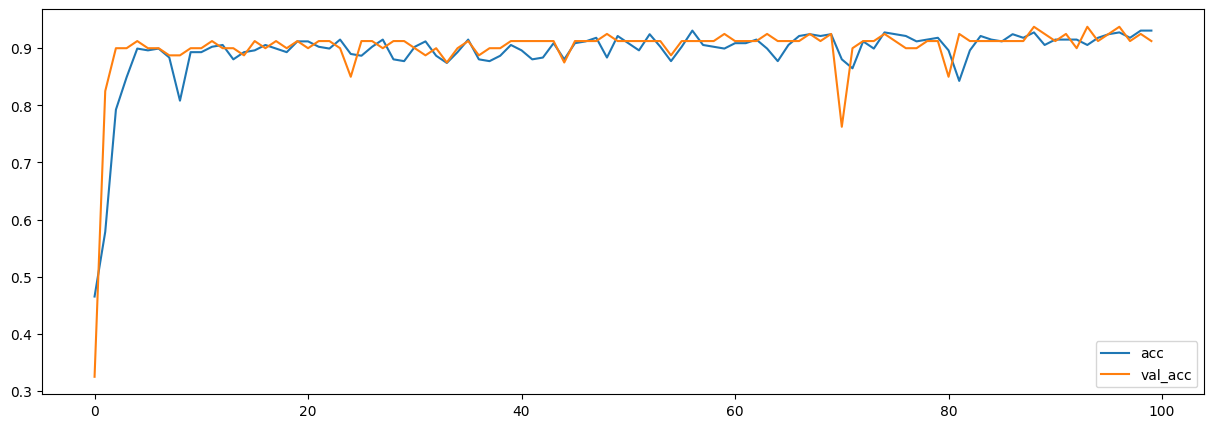

In [28]:
plt.figure(figsize = (15, 5))
plt.plot(h.history['accuracy'], label = 'acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()